Accuracy: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.00      0.00      0.00         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8



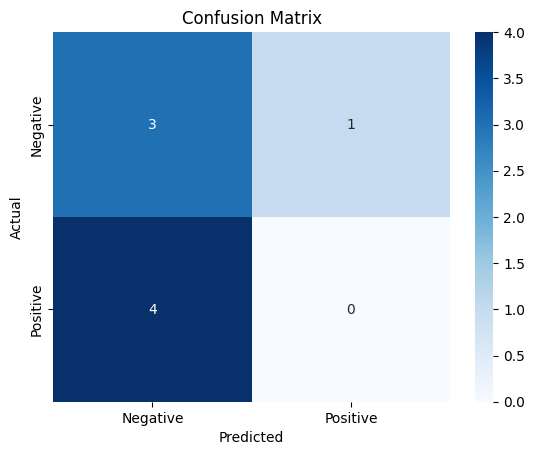

In [13]:
import os
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords only if not already downloaded, and suppress output
nltk.download('stopwords', quiet=True)

from nltk.corpus import stopwords

# Create sample dataset (20 reviews with sentiments)
data = {
    'review': [
        "Great product, very useful!",
        "Absolutely terrible. Waste of money.",
        "I love it. Will buy again.",
        "Not worth the price.",
        "Fantastic service and quality.",
        "Worst purchase I've made.",
        "Highly recommended!",
        "Poor quality and bad customer service.",
        "Excellent item, works perfectly.",
        "Don't buy this, it's a scam.",
        "This is amazing, exceeded expectations!",
        "Garbage, broke after one use.",
        "Truly wonderful experience.",
        "Disappointed and frustrated.",
        "Will definitely order again.",
        "Not what I expected. Very poor.",
        "Five stars! Outstanding.",
        "Never buying this again.",
        "Loved it so much!",
        "Cheap material and arrived late."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
                  1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Preprocessing - lowercase and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase and remove stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Train-test split with class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

# Print Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
